# **Maestría en Inteligencia Artificial Aplicada**
## **Curso: TC5035.10 Proyecto Integrador**
### Tecnológico de Monterrey
### Dra. Grettel Barceló Alonso 
### Dr. Luis Eduardo Falcón Morales

## **Avance 1. Análisis exploratorio de datos**


**Nombres y matrículas de los integrantes del equipo:**
| Nombre | Matrícula |
| --- | --- |
| Rodrigo López Aguilera | A01793071 |
| Alejandra Mendoza Flores | A01793032 |
| Diego Carrera Nicholls | A00464290 |


In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import pandas as pd
import numpy as np

# %matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [3]:
# import data
df = pd.read_csv('data/pickwin-active-users.csv')

In [4]:
df.head()

days_since_registration  purchases_count  purchases_amount  cashouts_count  \
0                3166.7917               22           14394.0               6   
1                3154.0417               11           59280.0               4   
2                3154.0417               20           33700.0               4   
3                3154.0000                1              50.0               0   
4                3154.0000               34           73150.0               0   

   cashouts_amount  total_bets  days_with_bets  total_risk  total_win  \
0          4884.44       638.0           368.0    25814.73   12973.19   
1        131934.00       820.0           281.0   145016.87  143386.51   
2          8000.00      1067.0           315.0   148694.00  125001.30   
3             0.00         4.0             4.0       30.00      20.14   
4             0.00       460.0           216.0   173839.00  101410.57   

   winning_bets  losing_bets  activity_ratio  win_ratio  risk_per_bet  \
0         146.0        492.0        0.116206   0.228840     40.461959   
1         235.0        584.0        0.089092   0.286585    176.849841   
2         241.0        826.0        0.099872   0.225867    139.357076   
3           2.0          2.0        0.001268   0.500000      7.500000   
4          95.0        365.0        0.068484   0.206522    377.910870   

   win_per_bet  loss_per_bet  churned  
0    20.334154     20.127806        0  
1   174.861598      1.988244        0  
2   117.152109     22.204967        1  
3     5.035000      2.465000        1  
4   220.457761    157.453109        1

In [5]:
df.shape

(24171, 17)

In [6]:
df.dtypes

days_since_registration    float64
purchases_count              int64
purchases_amount           float64
cashouts_count               int64
cashouts_amount            float64
total_bets                 float64
days_with_bets             float64
total_risk                 float64
total_win                  float64
winning_bets               float64
losing_bets                float64
activity_ratio             float64
win_ratio                  float64
risk_per_bet               float64
win_per_bet                float64
loss_per_bet               float64
churned                      int64
dtype: object

In [7]:
# check duplicates
df.duplicated().sum()

610

In [8]:
# check for missing values per feature
df.isnull().sum()

days_since_registration      0
purchases_count              0
purchases_amount             0
cashouts_count               0
cashouts_amount              0
total_bets                 500
days_with_bets             500
total_risk                 500
total_win                  507
winning_bets               500
losing_bets                500
activity_ratio             500
win_ratio                  500
risk_per_bet               500
win_per_bet                507
loss_per_bet               507
churned                      0
dtype: int64

In [9]:
df.isna().sum().sum() # number of missing cells

5521

In [10]:
round(df.isna().sum().sum() / df.size * 100, 1) # percentage of missing cells

1.3

In [11]:
# drop all rows with missing values
df = df.dropna()

In [12]:
df.isnull().sum()

days_since_registration    0
purchases_count            0
purchases_amount           0
cashouts_count             0
cashouts_amount            0
total_bets                 0
days_with_bets             0
total_risk                 0
total_win                  0
winning_bets               0
losing_bets                0
activity_ratio             0
win_ratio                  0
risk_per_bet               0
win_per_bet                0
loss_per_bet               0
churned                    0
dtype: int64

In [13]:
# check duplicates
df.duplicated().sum()

581

In [14]:
# remove duplicates
df = df.drop_duplicates()

In [15]:
df.duplicated().sum()

0

In [16]:
# remove all rows with zero values in all columns
df = df[(df.T != 0).any()]

In [17]:
df.shape

(23083, 17)

In [18]:
df['total_bets']     = df['total_bets'].astype(int)
df['days_with_bets'] = df['days_with_bets'].astype(int)
df['winning_bets']   = df['winning_bets'].astype(int)
df['losing_bets']    = df['losing_bets'].astype(int)

In [19]:
df.describe(include='all')

days_since_registration  purchases_count  purchases_amount  \
count             23083.000000     23083.000000      2.308300e+04   
mean               1548.120308         7.160898      1.099711e+05   
std                 672.057606        38.672862      2.548412e+06   
min                  30.583300         1.000000      1.000000e+01   
25%                1079.395850         1.000000      1.000000e+02   
50%                1637.541700         1.000000      2.500000e+02   
75%                2067.875000         3.000000      8.000000e+02   
max                3166.791700      1888.000000      1.000000e+08   

       cashouts_count  cashouts_amount    total_bets  days_with_bets  \
count    23083.000000     2.308300e+04  23083.000000    23083.000000   
mean         0.951220     2.976887e+05     63.917818       20.376208   
std          5.758698     4.087023e+06    673.451633       64.025792   
min          0.000000     0.000000e+00      1.000000        1.000000   
25%          0.000000     0.000000e+00      3.000000        2.000000   
50%          0.000000     0.000000e+00      8.000000        5.000000   
75%          0.000000     0.000000e+00     24.000000       14.000000   
max        228.000000     1.000000e+08  67543.000000     1540.000000   

         total_risk     total_win  winning_bets   losing_bets  activity_ratio  \
count  2.308300e+04  2.308300e+04  23083.000000  23083.000000    23083.000000   
mean   2.845205e+04  2.710247e+04     15.885024     47.978556        0.015130   
std    7.849237e+05  7.519889e+05    186.440451    500.743303        0.044987   
min    0.000000e+00  0.000000e+00      0.000000      0.000000        0.000317   
25%    1.900000e+02  0.000000e+00      0.000000      2.000000        0.001624   
50%    5.000000e+02  1.236000e+02      1.000000      7.000000        0.003957   
75%    1.745000e+03  1.119680e+03      5.000000     19.000000        0.010271   
max    6.524585e+07  6.336127e+07  17863.000000  49680.000000        0.951148   

          win_ratio   risk_per_bet    win_per_bet  loss_per_bet       churned  
count  23083.000000   23083.000000   23083.000000  23083.000000  23083.000000  
mean       0.175248     316.338560     245.347339     70.991221      0.946367  
std        0.200034    2910.096559    2825.958653   1016.266969      0.225296  
min        0.000000       0.000000       0.000000 -67385.780000      0.000000  
25%        0.000000      33.333333       0.000000      7.320714      1.000000  
50%        0.147059      57.142857      11.249444     28.501964      1.000000  
75%        0.250000     127.500000      52.109929     70.000000      1.000000  
max        1.000000  267070.529565  262601.564565  40000.000000      1.000000

In [20]:
# from ydata_profiling import ProfileReport

In [21]:
# profile = ProfileReport(df, title='User Betting Activity', explorative=True)

In [22]:
# profile.to_widgets()

In [23]:
# import sweetviz as sv

In [24]:
# my_report = sv.analyze(df, target_feat='churned')

In [25]:
# my_report.show_notebook()

### ¿Hay valores faltantes en el conjunto de datos? ¿Se pueden identificar patrones de ausencia?
Si existen varlores faltantes en el conjunto de datos

| Columna | Valores faltantes |
| --- | --- |
| total_bets     | 500 |
| days_with_bets | 500 |
| total_risk     | 500 |
| total_win      | 507 |
| winning_bets   | 500 |
| losing_bets    | 500 |
| activity_ratio | 500 |
| win_ratio      | 500 |
| risk_per_bet   | 500 |
| win_per_bet    | 507 |
| loss_per_bet   | 507 |

De un total de 24171 registros, 507 son las columnas que tienen mas valores faltantes, esto representa el 2.09% del total de registros. Lo cual no es un porcentaje significativo, por lo que se puede eliminar los registros que contienen valores faltantes.
No se nota ningún patrón identificable de ausencia de datos.

Se encontraron 581 registros con valores duplicados que han sido eliminados.



### ¿Cuáles son las estadísticas resumidas del conjunto de datos?


In [26]:
df.describe(include='all').T

count           mean           std           min  \
days_since_registration  23083.0    1548.120308  6.720576e+02     30.583300   
purchases_count          23083.0       7.160898  3.867286e+01      1.000000   
purchases_amount         23083.0  109971.131562  2.548412e+06     10.000000   
cashouts_count           23083.0       0.951220  5.758698e+00      0.000000   
cashouts_amount          23083.0  297688.740615  4.087023e+06      0.000000   
total_bets               23083.0      63.917818  6.734516e+02      1.000000   
days_with_bets           23083.0      20.376208  6.402579e+01      1.000000   
total_risk               23083.0   28452.045152  7.849237e+05      0.000000   
total_win                23083.0   27102.468671  7.519889e+05      0.000000   
winning_bets             23083.0      15.885024  1.864405e+02      0.000000   
losing_bets              23083.0      47.978556  5.007433e+02      0.000000   
activity_ratio           23083.0       0.015130  4.498711e-02      0.000317   
win_ratio                23083.0       0.175248  2.000341e-01      0.000000   
risk_per_bet             23083.0     316.338560  2.910097e+03      0.000000   
win_per_bet              23083.0     245.347339  2.825959e+03      0.000000   
loss_per_bet             23083.0      70.991221  1.016267e+03 -67385.780000   
churned                  23083.0       0.946367  2.252960e-01      0.000000   

                                 25%          50%          75%           max  
days_since_registration  1079.395850  1637.541700  2067.875000  3.166792e+03  
purchases_count             1.000000     1.000000     3.000000  1.888000e+03  
purchases_amount          100.000000   250.000000   800.000000  1.000000e+08  
cashouts_count              0.000000     0.000000     0.000000  2.280000e+02  
cashouts_amount             0.000000     0.000000     0.000000  1.000000e+08  
total_bets                  3.000000     8.000000    24.000000  6.754300e+04  
days_with_bets              2.000000     5.000000    14.000000  1.540000e+03  
total_risk                190.000000   500.000000  1745.000000  6.524585e+07  
total_win                   0.000000   123.600000  1119.680000  6.336127e+07  
winning_bets                0.000000     1.000000     5.000000  1.786300e+04  
losing_bets                 2.000000     7.000000    19.000000  4.968000e+04  
activity_ratio              0.001624     0.003957     0.010271  9.511477e-01  
win_ratio                   0.000000     0.147059     0.250000  1.000000e+00  
risk_per_bet               33.333333    57.142857   127.500000  2.670705e+05  
win_per_bet                 0.000000    11.249444    52.109929  2.626016e+05  
loss_per_bet                7.320714    28.501964    70.000000  4.000000e+04  
churned                     1.000000     1.000000     1.000000  1.000000e+00


### ¿Hay valores atípicos en el conjunto de datos?

Encontramos muchos valores atípicos a lo largo de todas las columnas, se tienen que analizar en que forma se pueden resolver estos valores atípicos, ya que no se pueden eliminar todos los registros que contienen valores atípicos, ya que se perdería mucha información.

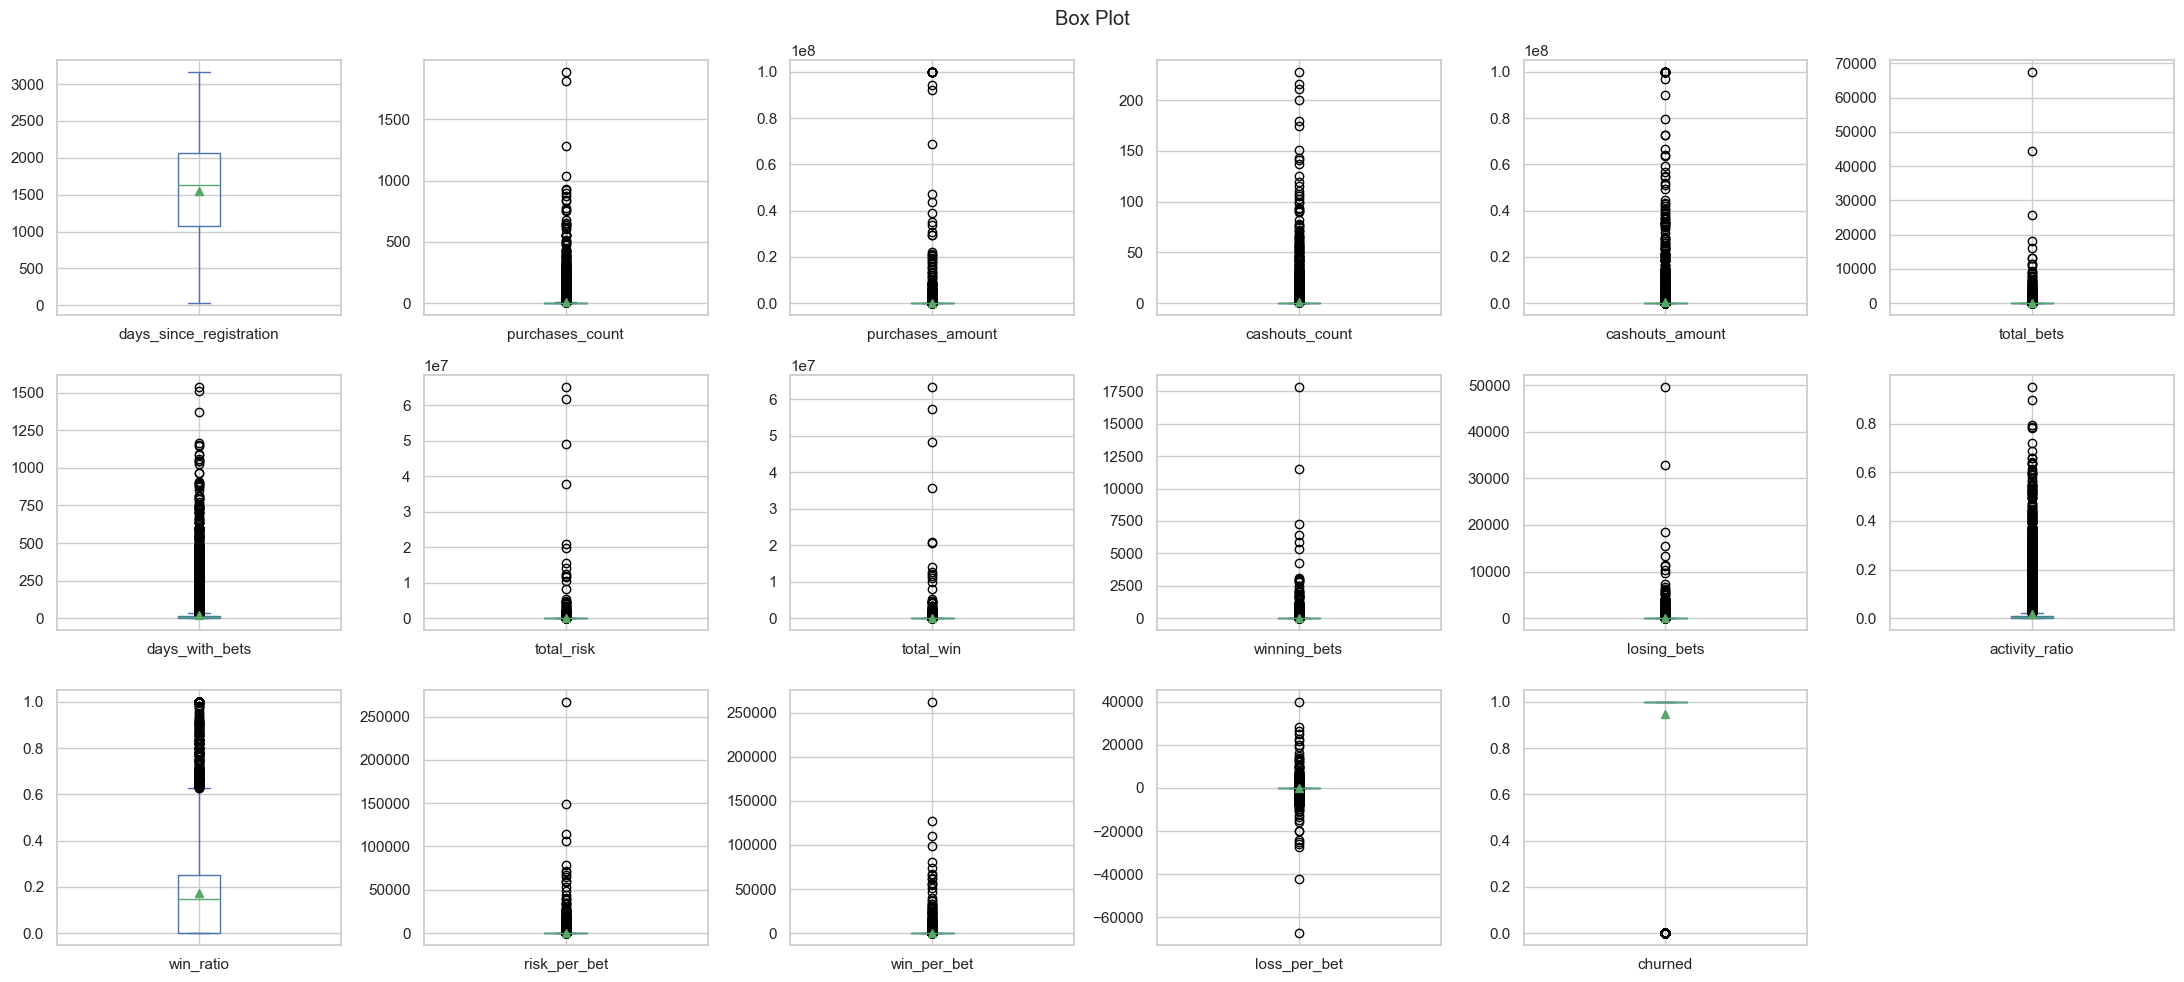

In [27]:
# draw a box plot for each feature in a grid of 4x4 subplots
# compact version
df.plot(kind='box', subplots=True, layout=(3,6), sharex=False, sharey=False, figsize=(22,10), title='Box Plot', showmeans=True)
plt.tight_layout()
plt.show()


### ¿Cuál es la cardinalidad de las variables categóricas?



### ¿Existen distribuciones sesgadas en el conjunto de datos? ¿Necesitamos aplicar alguna transformación no lineal?


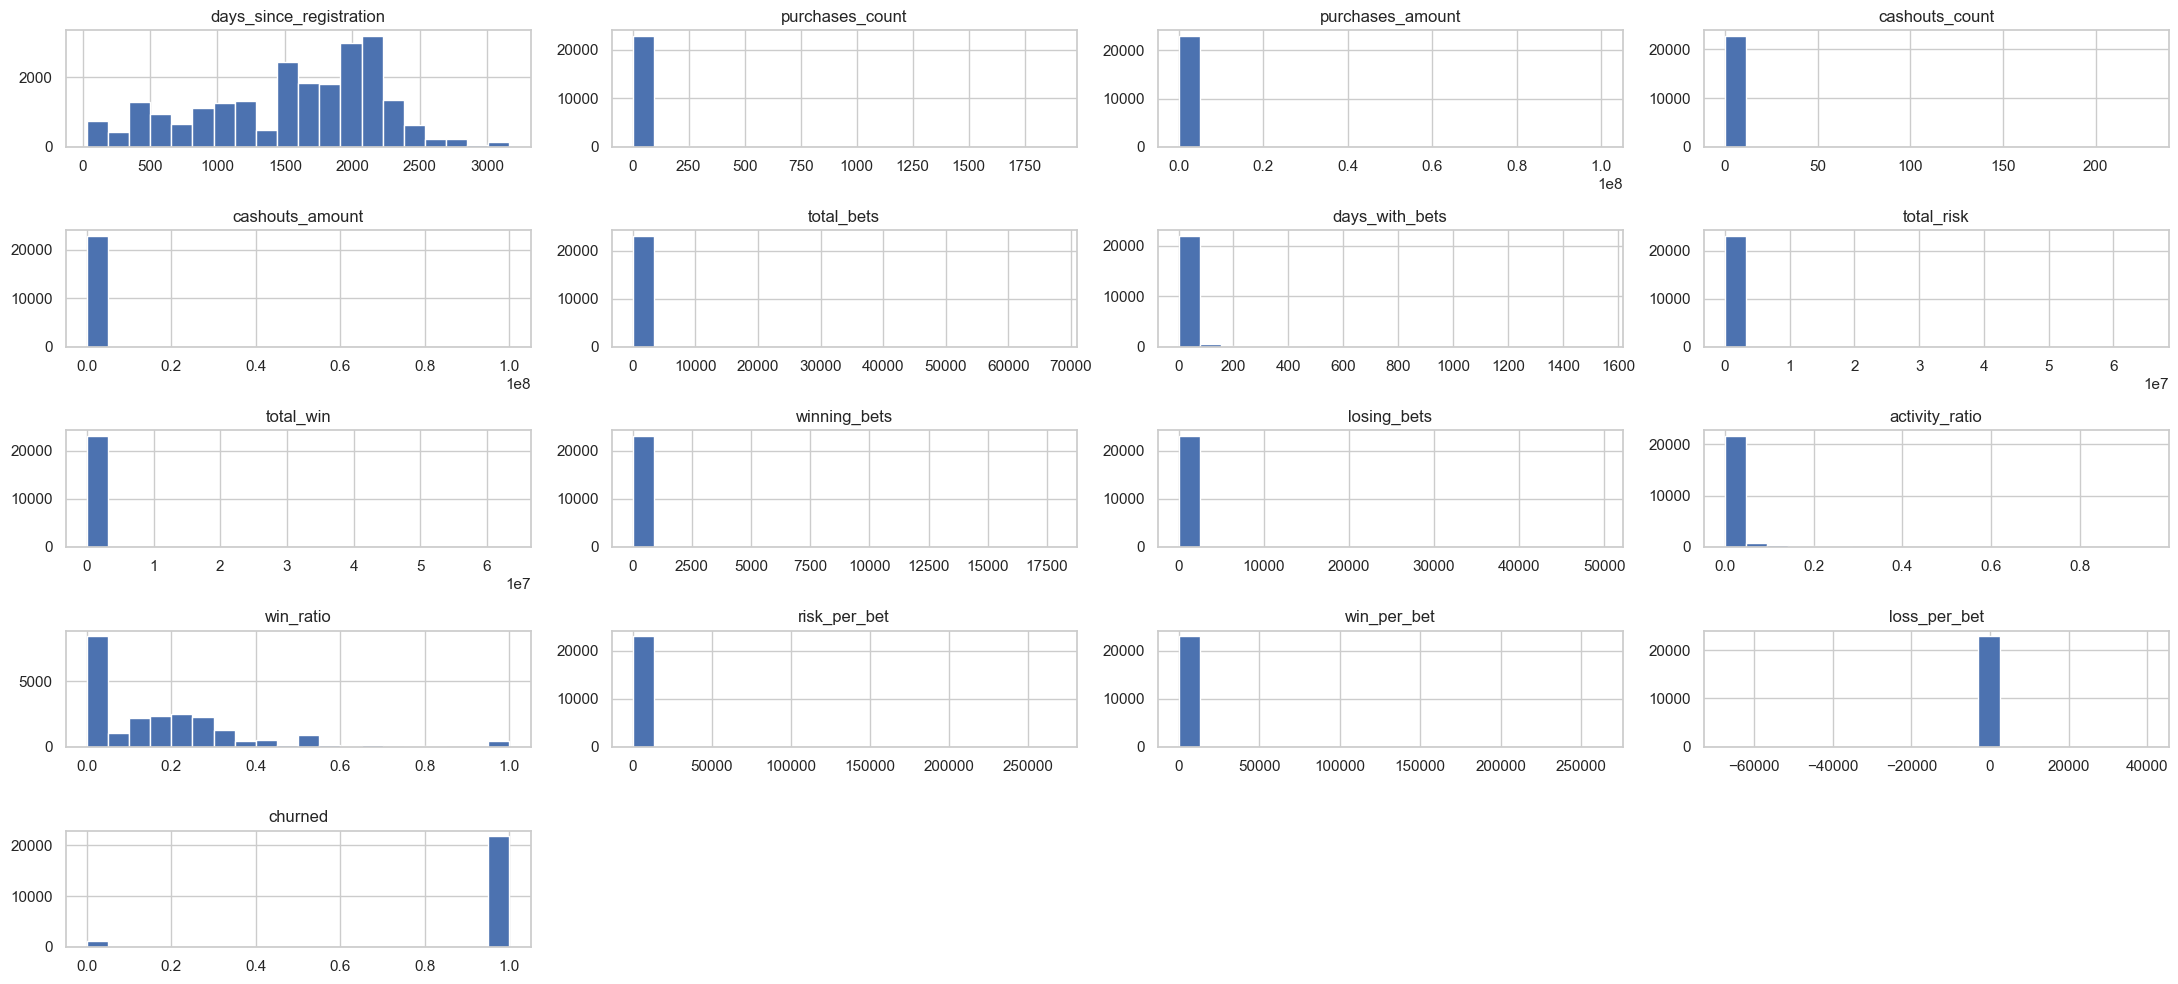

In [28]:
# histograms for each feature
df.hist(figsize=(22,10), bins=20)
plt.tight_layout()
plt.show()

A continuación presentamos una serie de transformaciones no lineales que se pueden aplicar a las variables numéricas para reducir el sesgo en los datos.

In [29]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer

/Users/chango/Documents/Maestria/Proyecto Integrador/venv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


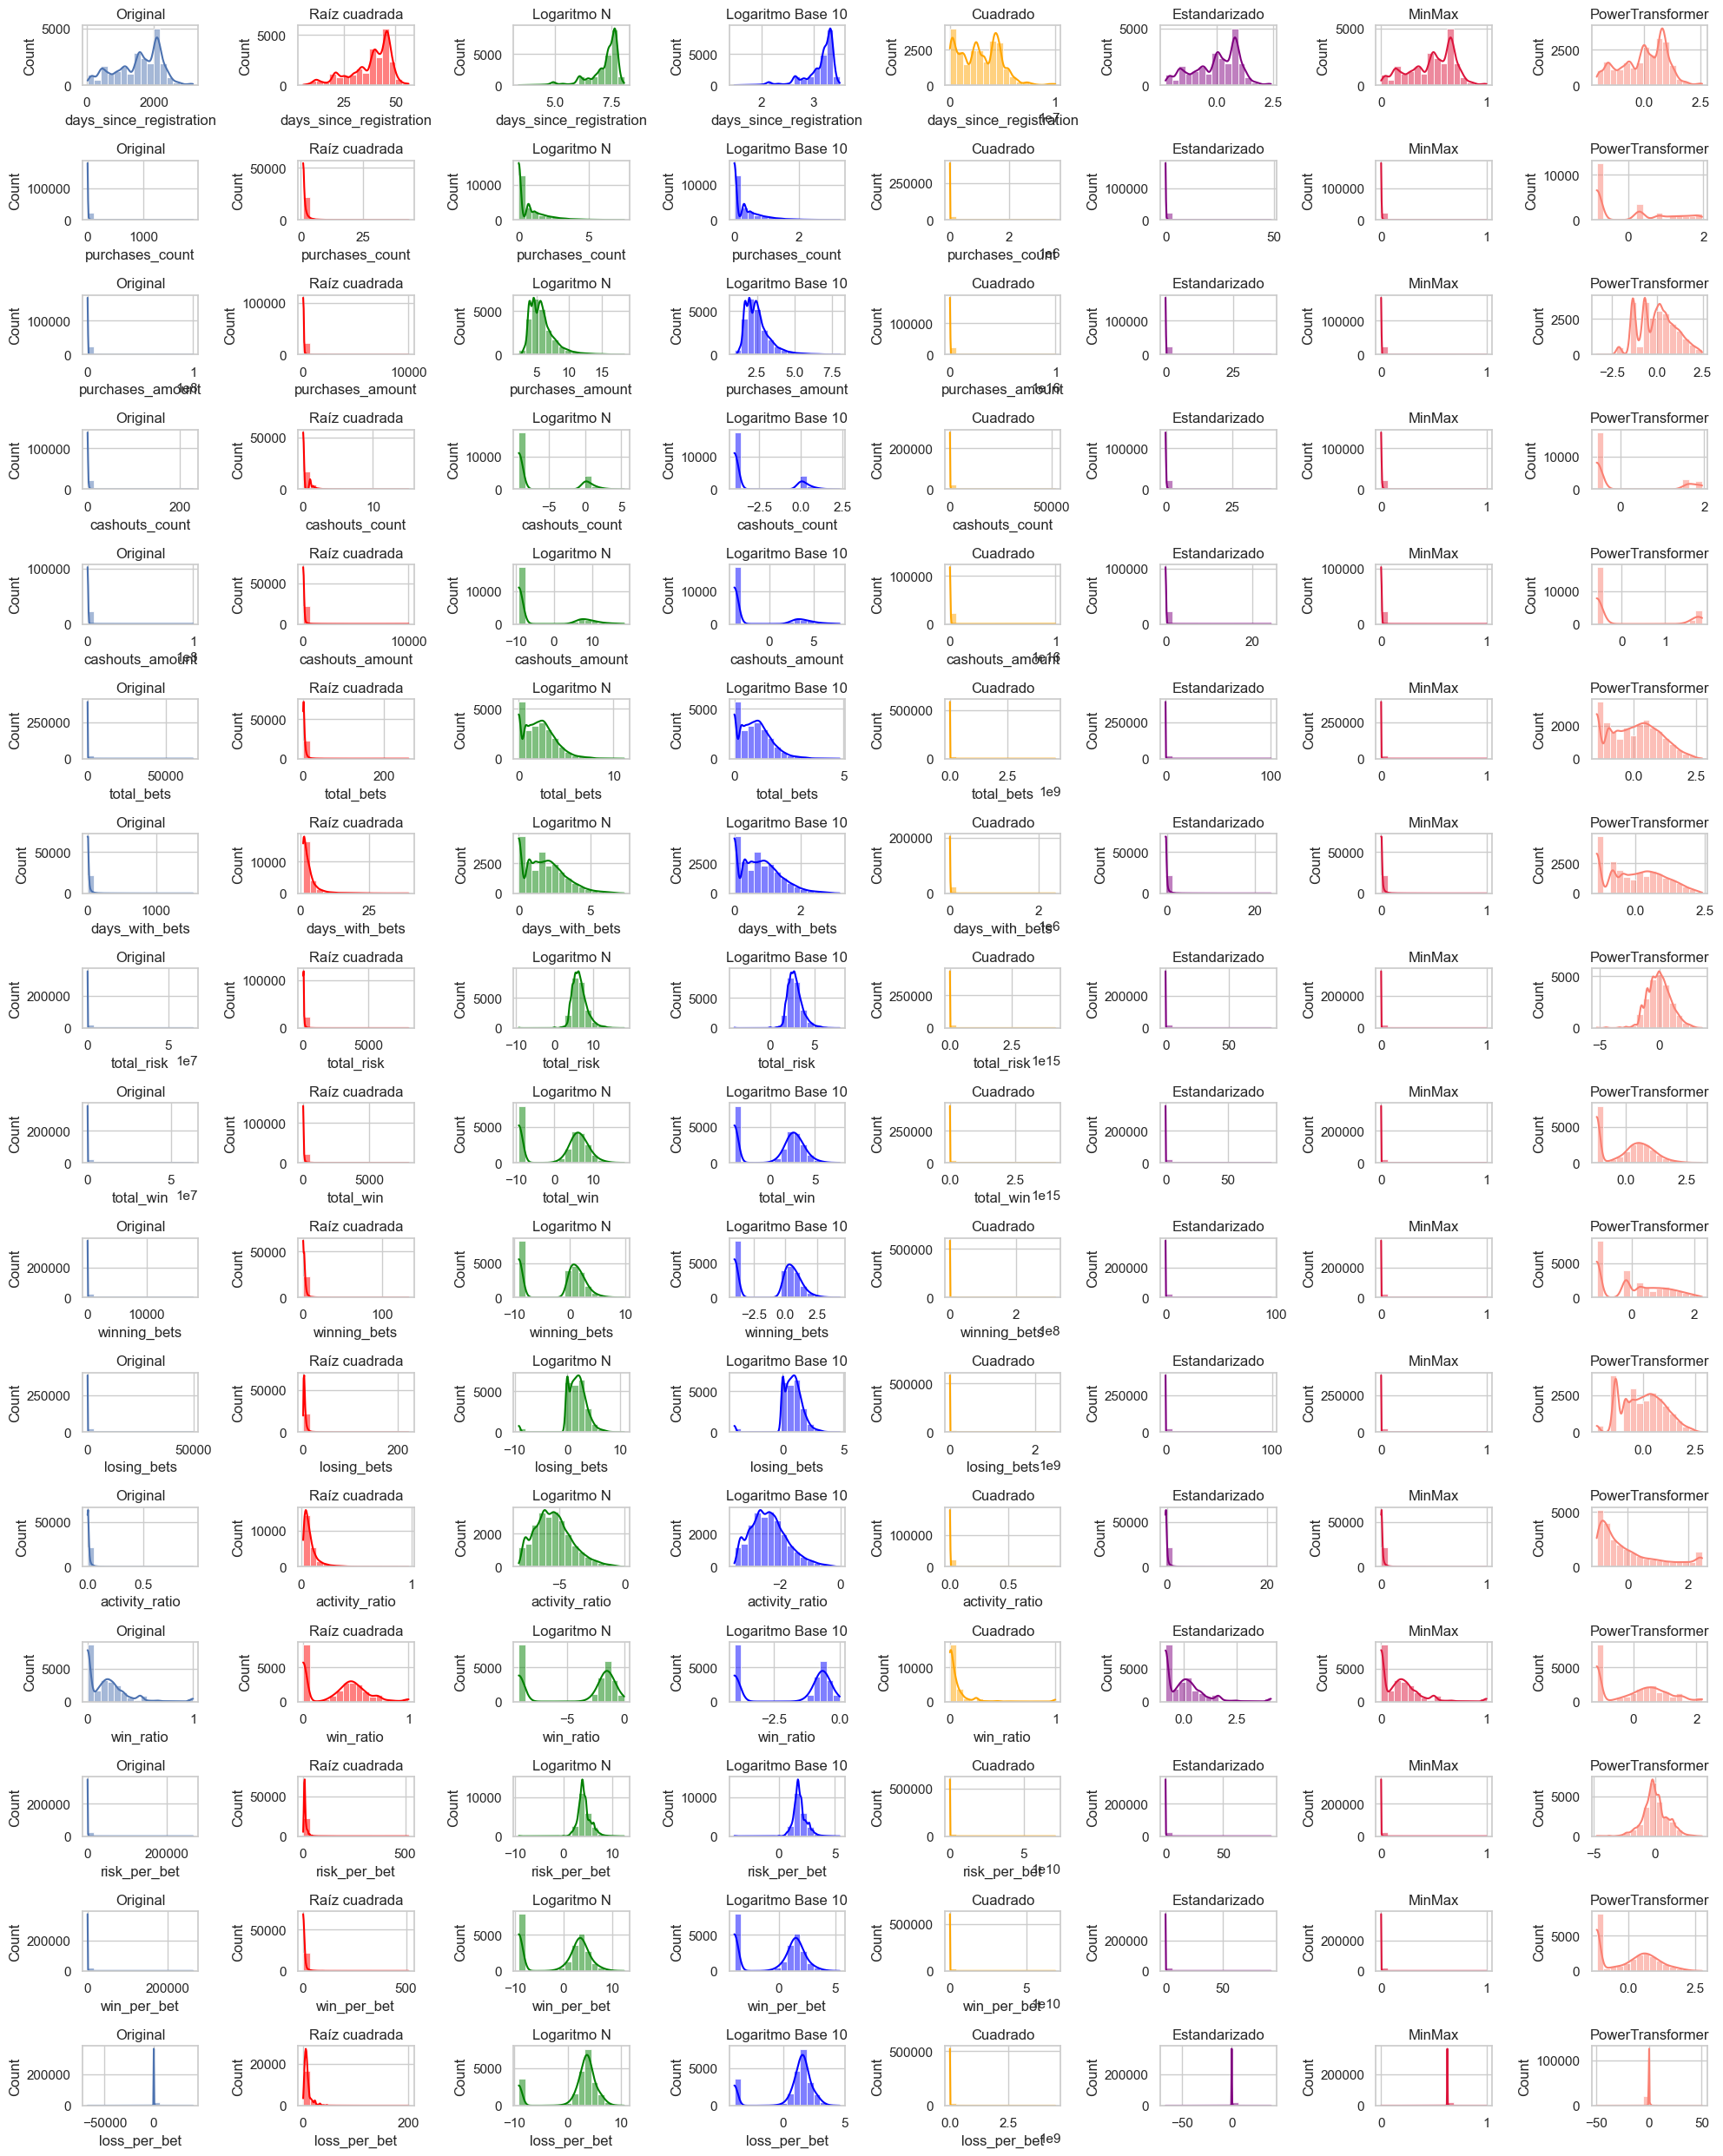

In [77]:



scaler = StandardScaler()
minmax = MinMaxScaler()
power_transformer = PowerTransformer()
# posibles transformaciones
to_transform_numerical = df.select_dtypes(include=np.number).columns.tolist()
# remove churned
to_transform_numerical.remove('churned')

fig, axes = plt.subplots( len(to_transform_numerical), 8, figsize=(20, 25))

plt.subplots_adjust(hspace=0.5, wspace=0.5)

for i, col in enumerate(to_transform_numerical):
    # plt.subplot(len(to_transform_numerical), 4, i*4+1)

    standard_scaled = scaler.fit_transform(df[col].values.reshape(-1, 1)).flatten()
    min_max_scaled  = minmax.fit_transform(df[col].values.reshape(-1, 1)).flatten()
    power_scaled    = power_transformer.fit_transform(df[col].values.reshape(-1, 1)).flatten()

    sns.histplot(data=df[col],              ax=axes[i, 0], kde=True, bins="sturges").set(title='Original')
    sns.histplot(data=np.sqrt(df[col]),     ax=axes[i, 1], kde=True, color="red",     bins="sturges").set(title='Raíz cuadrada')

    # add a small c because log(0) is undefined
    data = df[col].copy()
    data[data <= 0] = 1e-4
    sns.histplot(data=np.log(data),         ax=axes[i, 2], kde=True, color="green",   bins="sturges").set(title='Logaritmo N')
    sns.histplot(data=np.log10(data),       ax=axes[i, 3], kde=True, color="blue",   bins="sturges").set(title='Logaritmo Base 10')
    sns.histplot(data=np.power(df[col], 2), ax=axes[i, 4], kde=True, color="orange",  bins="sturges").set(title='Cuadrado')
    sns.histplot(data=standard_scaled,      ax=axes[i, 5], kde=True, color="purple",  bins="sturges").set(title='Estandarizado')
    sns.histplot(data=min_max_scaled,       ax=axes[i, 6], kde=True, color="crimson", bins="sturges").set(title='MinMax')
    sns.histplot(data=power_scaled,         ax=axes[i, 7], kde=True, color="salmon",  bins="sturges").set(title='PowerTransformer')

plt.tight_layout()
plt.show()


Se aplicaron transformaciones a todas las columnas, las mas prometedoras de acuerdo a los resultados obtenidos son logaritmicas y powertransform.

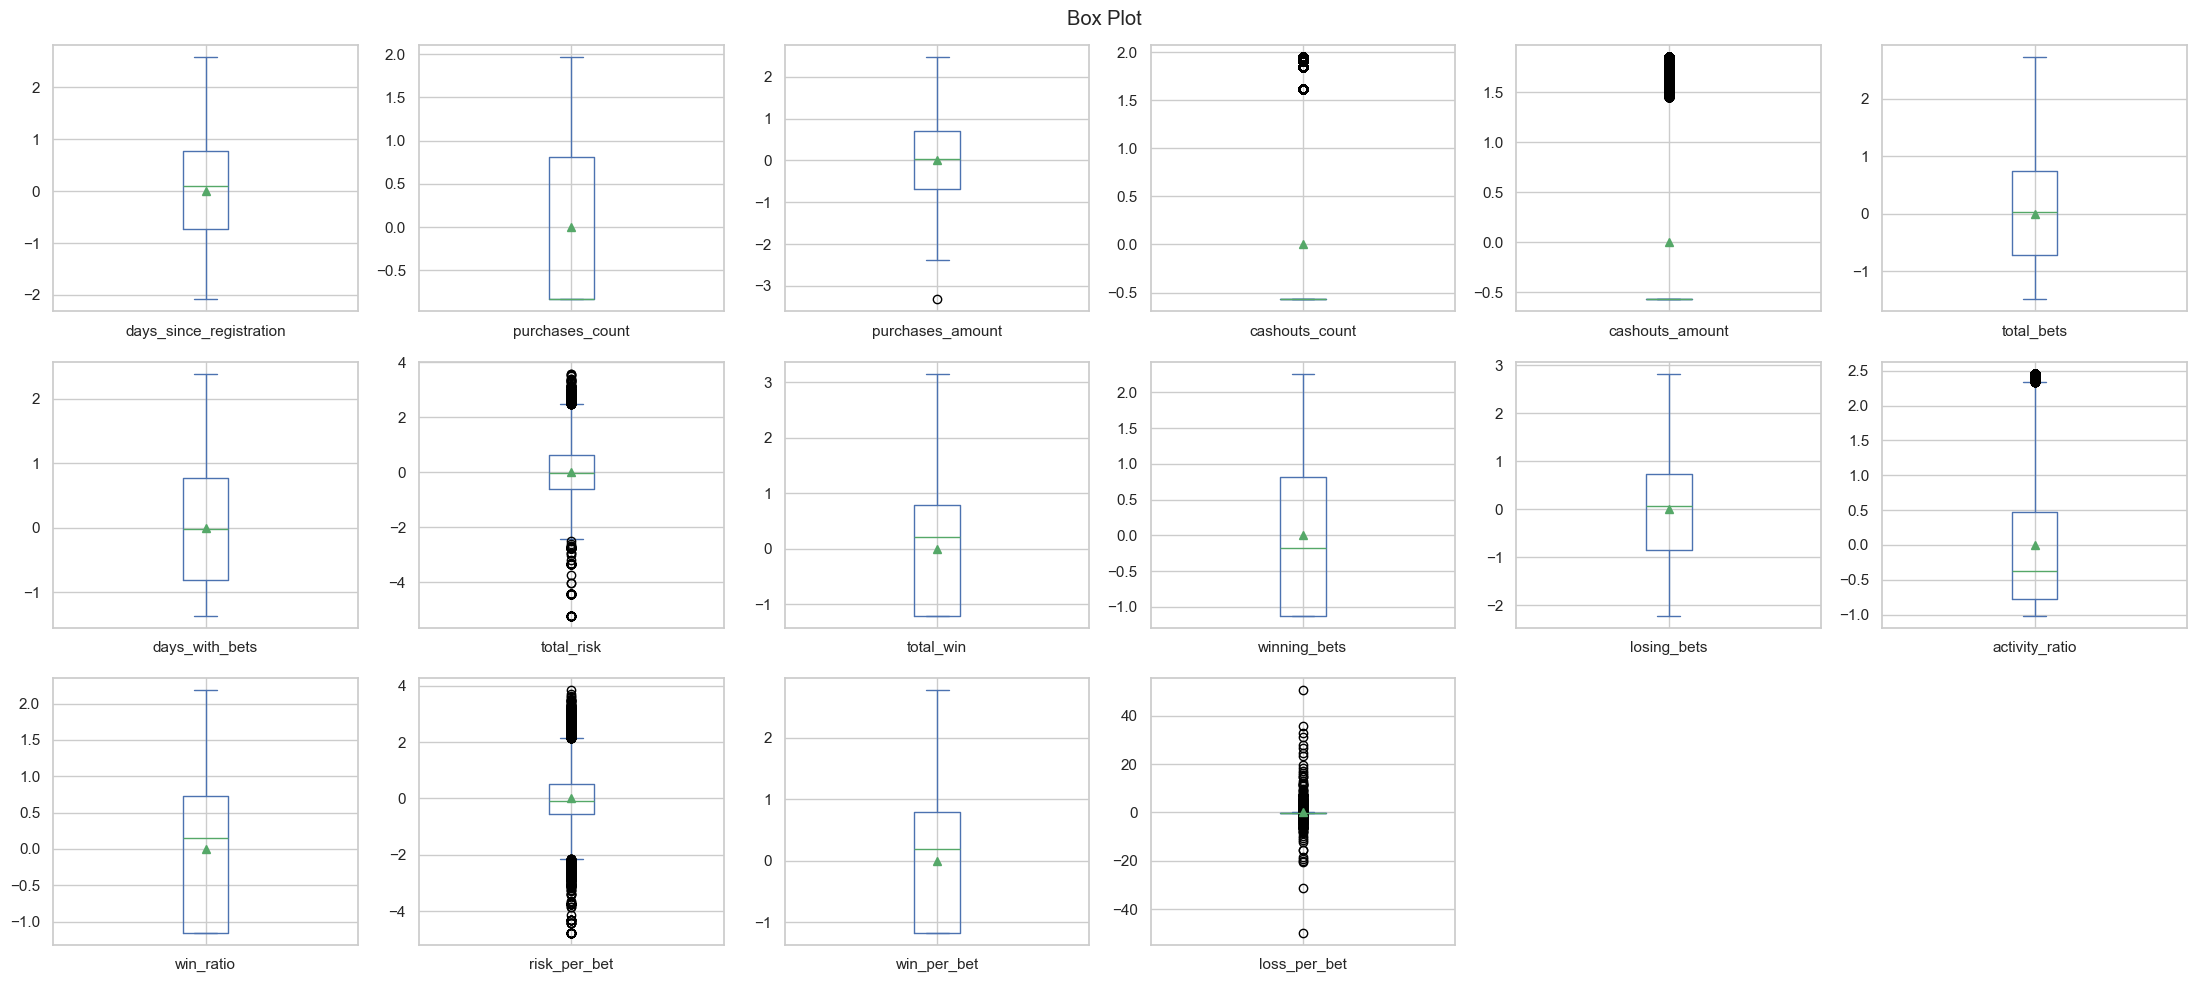

In [31]:
# box plots of PowerTransformer
trandformed_df = pd.DataFrame(power_transformer.fit_transform(df[to_transform_numerical]), columns=to_transform_numerical)
trandformed_df.plot(kind='box', subplots=True, layout=(3,6), sharex=False, sharey=False, figsize=(22,10), title='Box Plot', showmeans=True)
plt.tight_layout()
plt.show()



Aun se observan valores atípicos en las columnas, por lo que se tienen que analizar en que forma se pueden resolver estos valores atípicos, ya que no se pueden eliminar todos los registros que contienen valores atípicos, ya que se perdería mucha información.


### ¿Se identifican tendencias temporales? (En caso de que el conjunto incluya una dimensión de tiempo).

NO se identifican tendencias temporales en el conjunto de datos, no se tiene una columna que indique fecha.
La variable days_since_registration solo indica el número de días que han pasado desde que el usuario se registró en la plataforma, pero no indica una fecha específica.

### ¿Hay correlación entre las variables dependientes e independientes?


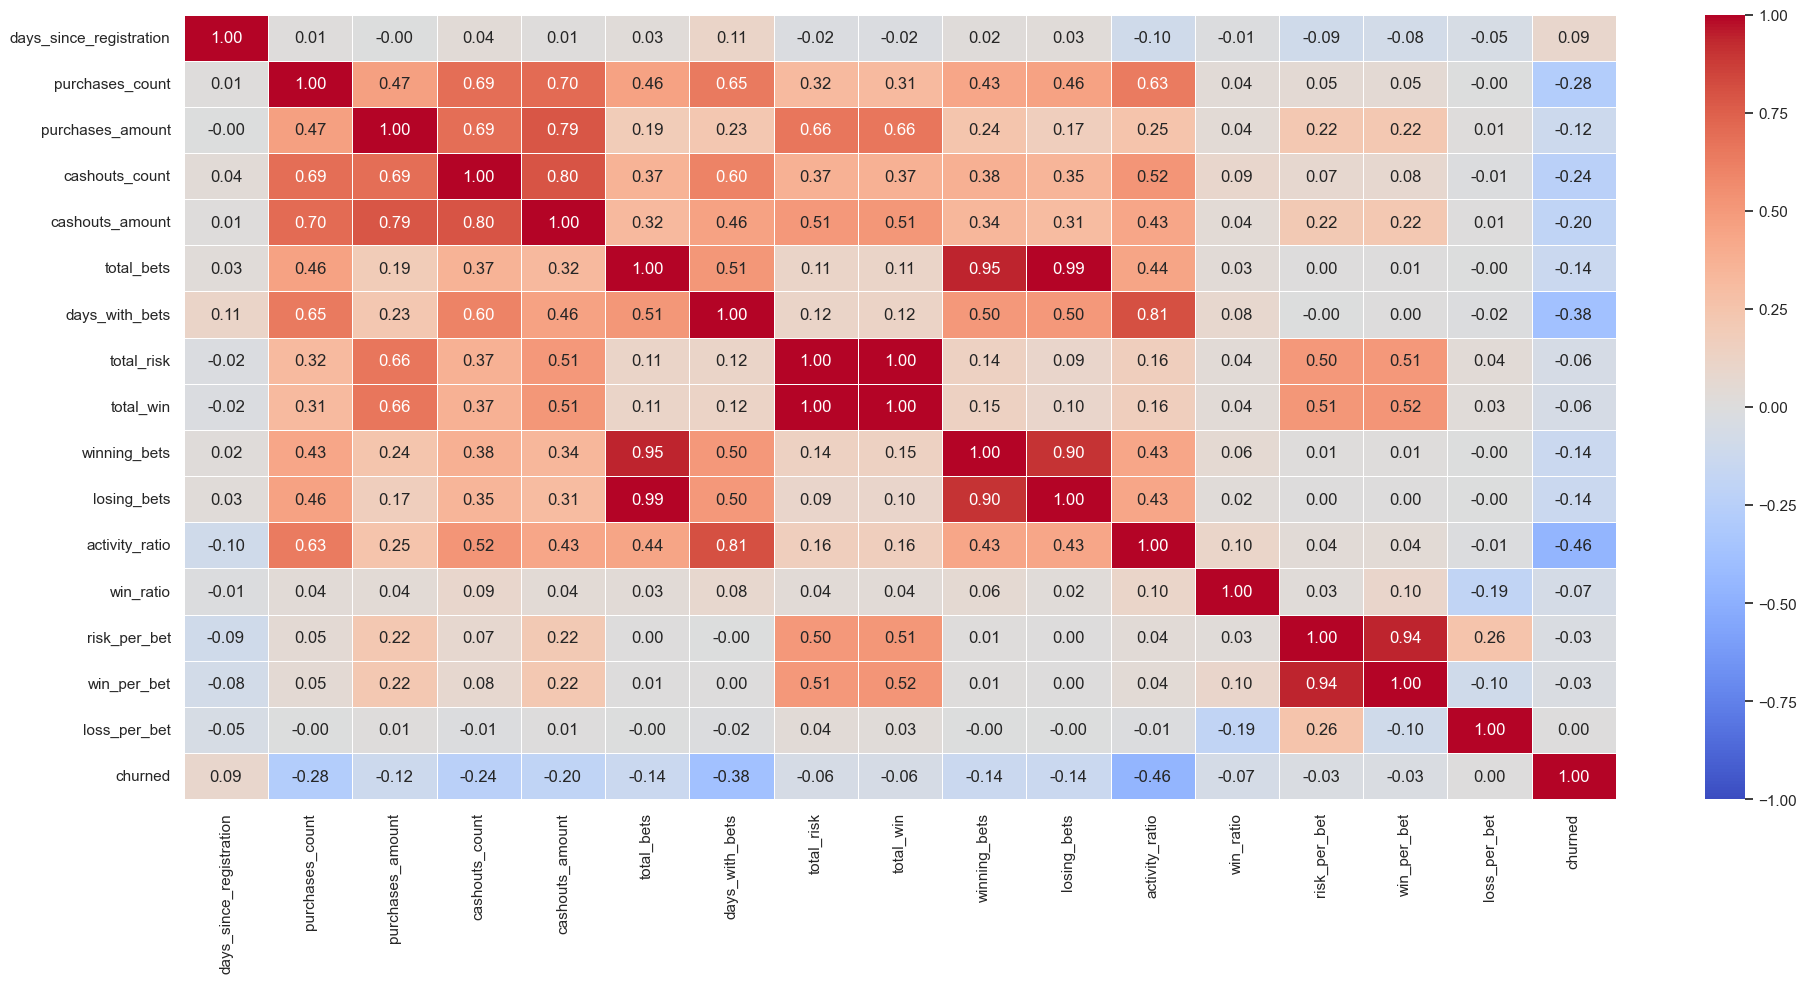

In [32]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidth=.5, vmin=-1, vmax=1, cmap='coolwarm')
plt.tight_layout()
plt.show()

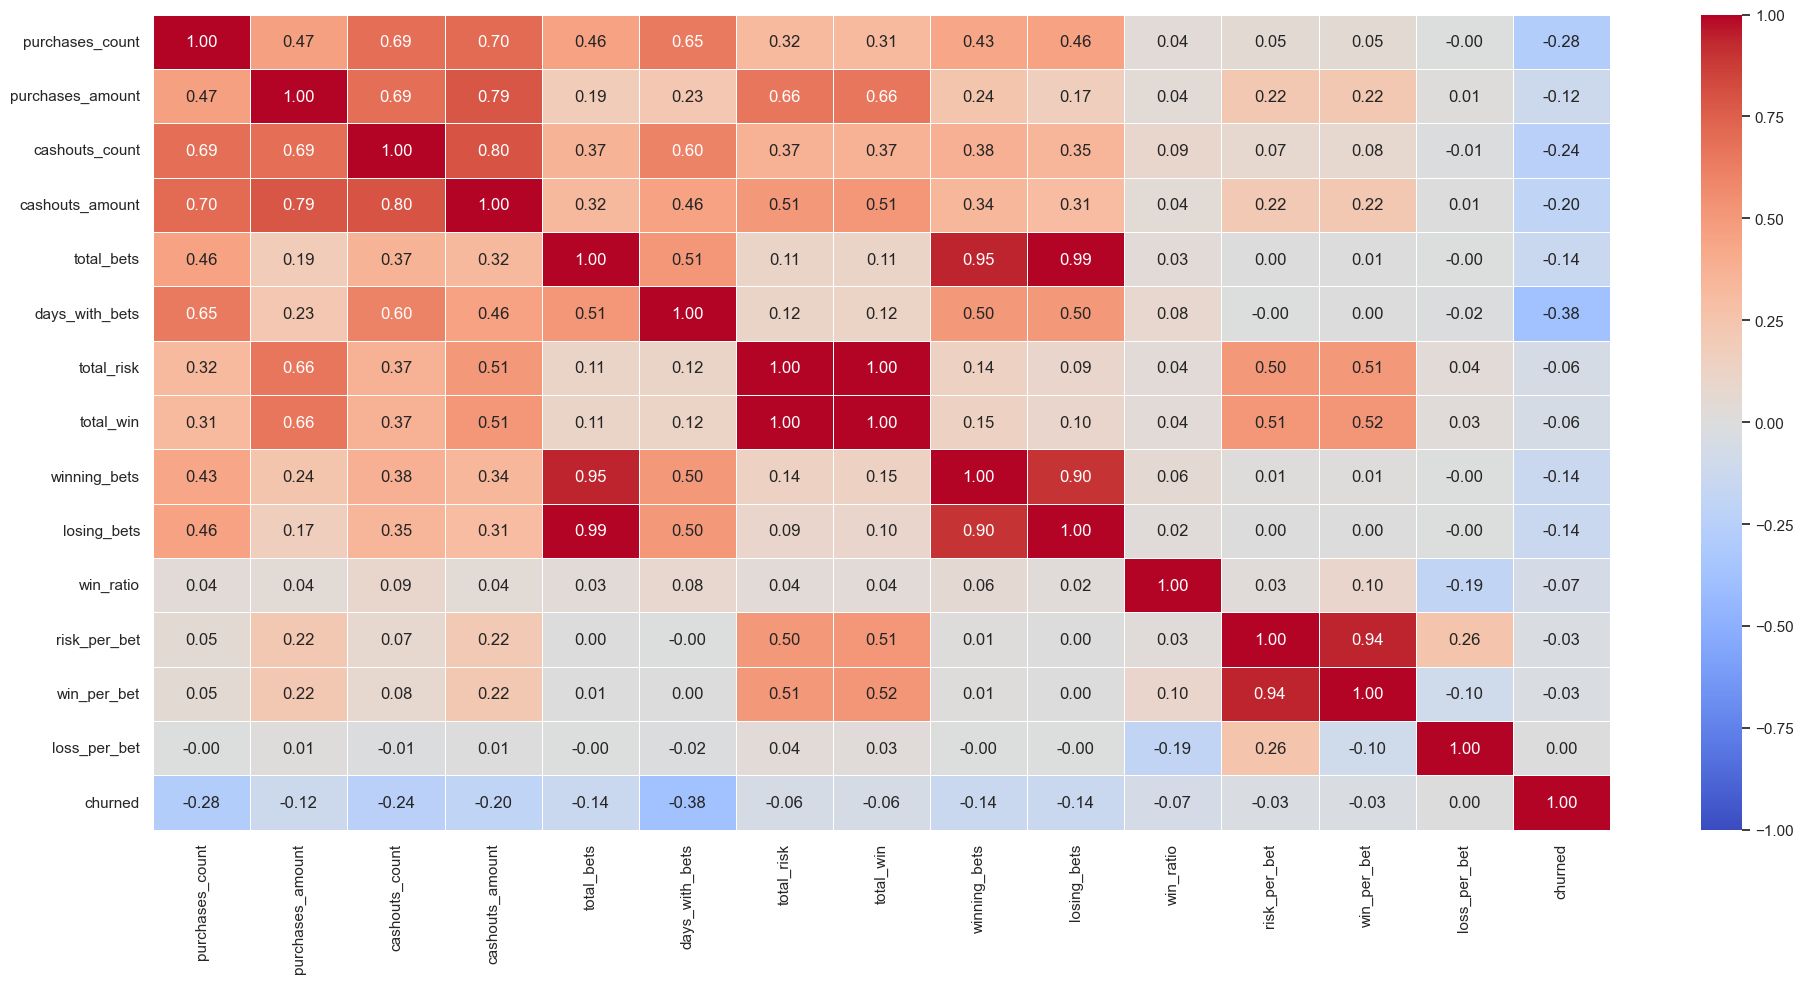

In [78]:
newDf = df.copy()
# drop columns with high correlation
newDf = newDf.drop(['days_since_registration', 'activity_ratio'], axis=1)

plt.figure(figsize=(20, 10))
sns.heatmap(newDf.corr(), annot=True, fmt='.2f', linewidth=.5, vmin=-1, vmax=1, cmap='coolwarm')
plt.tight_layout()
plt.show()

Las variables que se correlacionan con la variable churn son:

In [33]:
# variables con mayor correlación positiva con churned
df.corr()['churned'].sort_values(ascending=False).head(10)

churned                    1.000000
days_since_registration    0.092420
loss_per_bet               0.001879
risk_per_bet              -0.026626
win_per_bet               -0.028094
total_risk                -0.060930
total_win                 -0.061125
win_ratio                 -0.069631
purchases_amount          -0.118761
losing_bets               -0.135745
Name: churned, dtype: float64

In [34]:
# variables con mayor correlación negativa con churned
df.corr()['churned'].sort_values(ascending=True).head(10)

activity_ratio     -0.461462
days_with_bets     -0.378316
purchases_count    -0.280736
cashouts_count     -0.240573
cashouts_amount    -0.200052
total_bets         -0.139558
winning_bets       -0.138298
losing_bets        -0.135745
purchases_amount   -0.118761
win_ratio          -0.069631
Name: churned, dtype: float64


### ¿Cómo se distribuyen los datos en función de diferentes categorías?


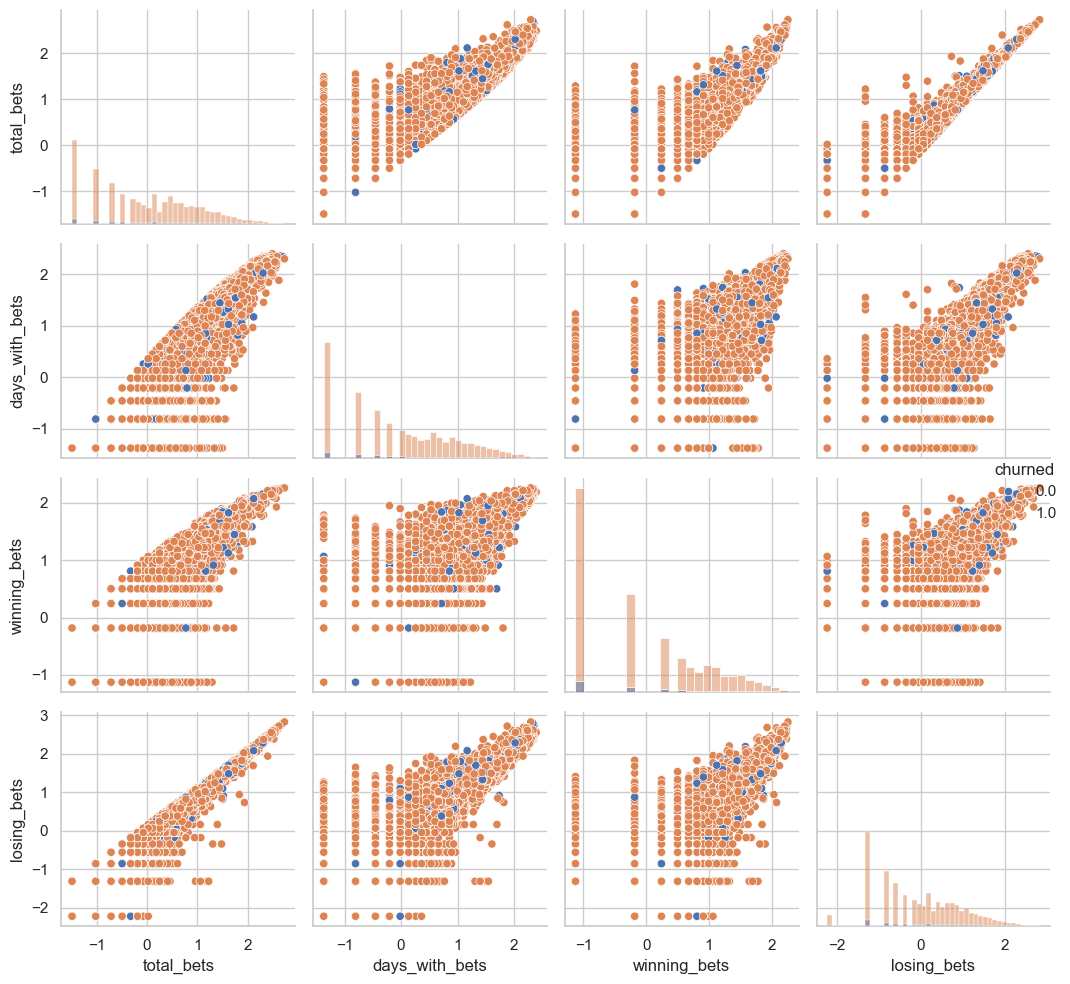

In [75]:
# grafica como se distribuyen los datos en función de churned
# pick 4 features
features = ['total_bets', 'days_with_bets', 'winning_bets', 'losing_bets']
# apply  power transformation
transformedDf = pd.DataFrame(power_transformer.fit_transform(df[features]), columns=features)
# add churned column
transformedDf['churned'] = df['churned']

# pairplot
sns.pairplot(transformedDf, hue='churned', diag_kind='hist')
plt.tight_layout()
plt.show()





### ¿Existen patrones o agrupaciones (clusters) en los datos con características similares?


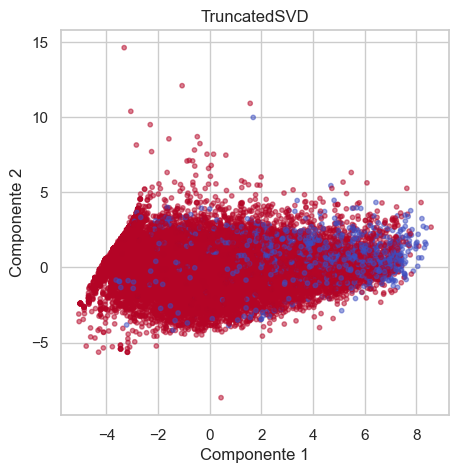

In [65]:
# truncatedSVD
from sklearn.decomposition import TruncatedSVD

X = df.drop(columns=['churned'])
y = df['churned']
X = power_transformer.fit_transform(X)

svd = TruncatedSVD(n_components=2, n_iter=20, random_state=42)
svd.fit(X)
X_svd = svd.transform(X)

plt.figure(figsize=(5, 5))
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=y, cmap='coolwarm', alpha=0.5, s=10)
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title('TruncatedSVD')
plt.show()




Usando TruncatedSVD para reducir la dimensionalidad de los datos, observamos que al agruparse todos los datos de ambos componentes en el centro dell gráfico no obtenemos una buena separación de los datos.

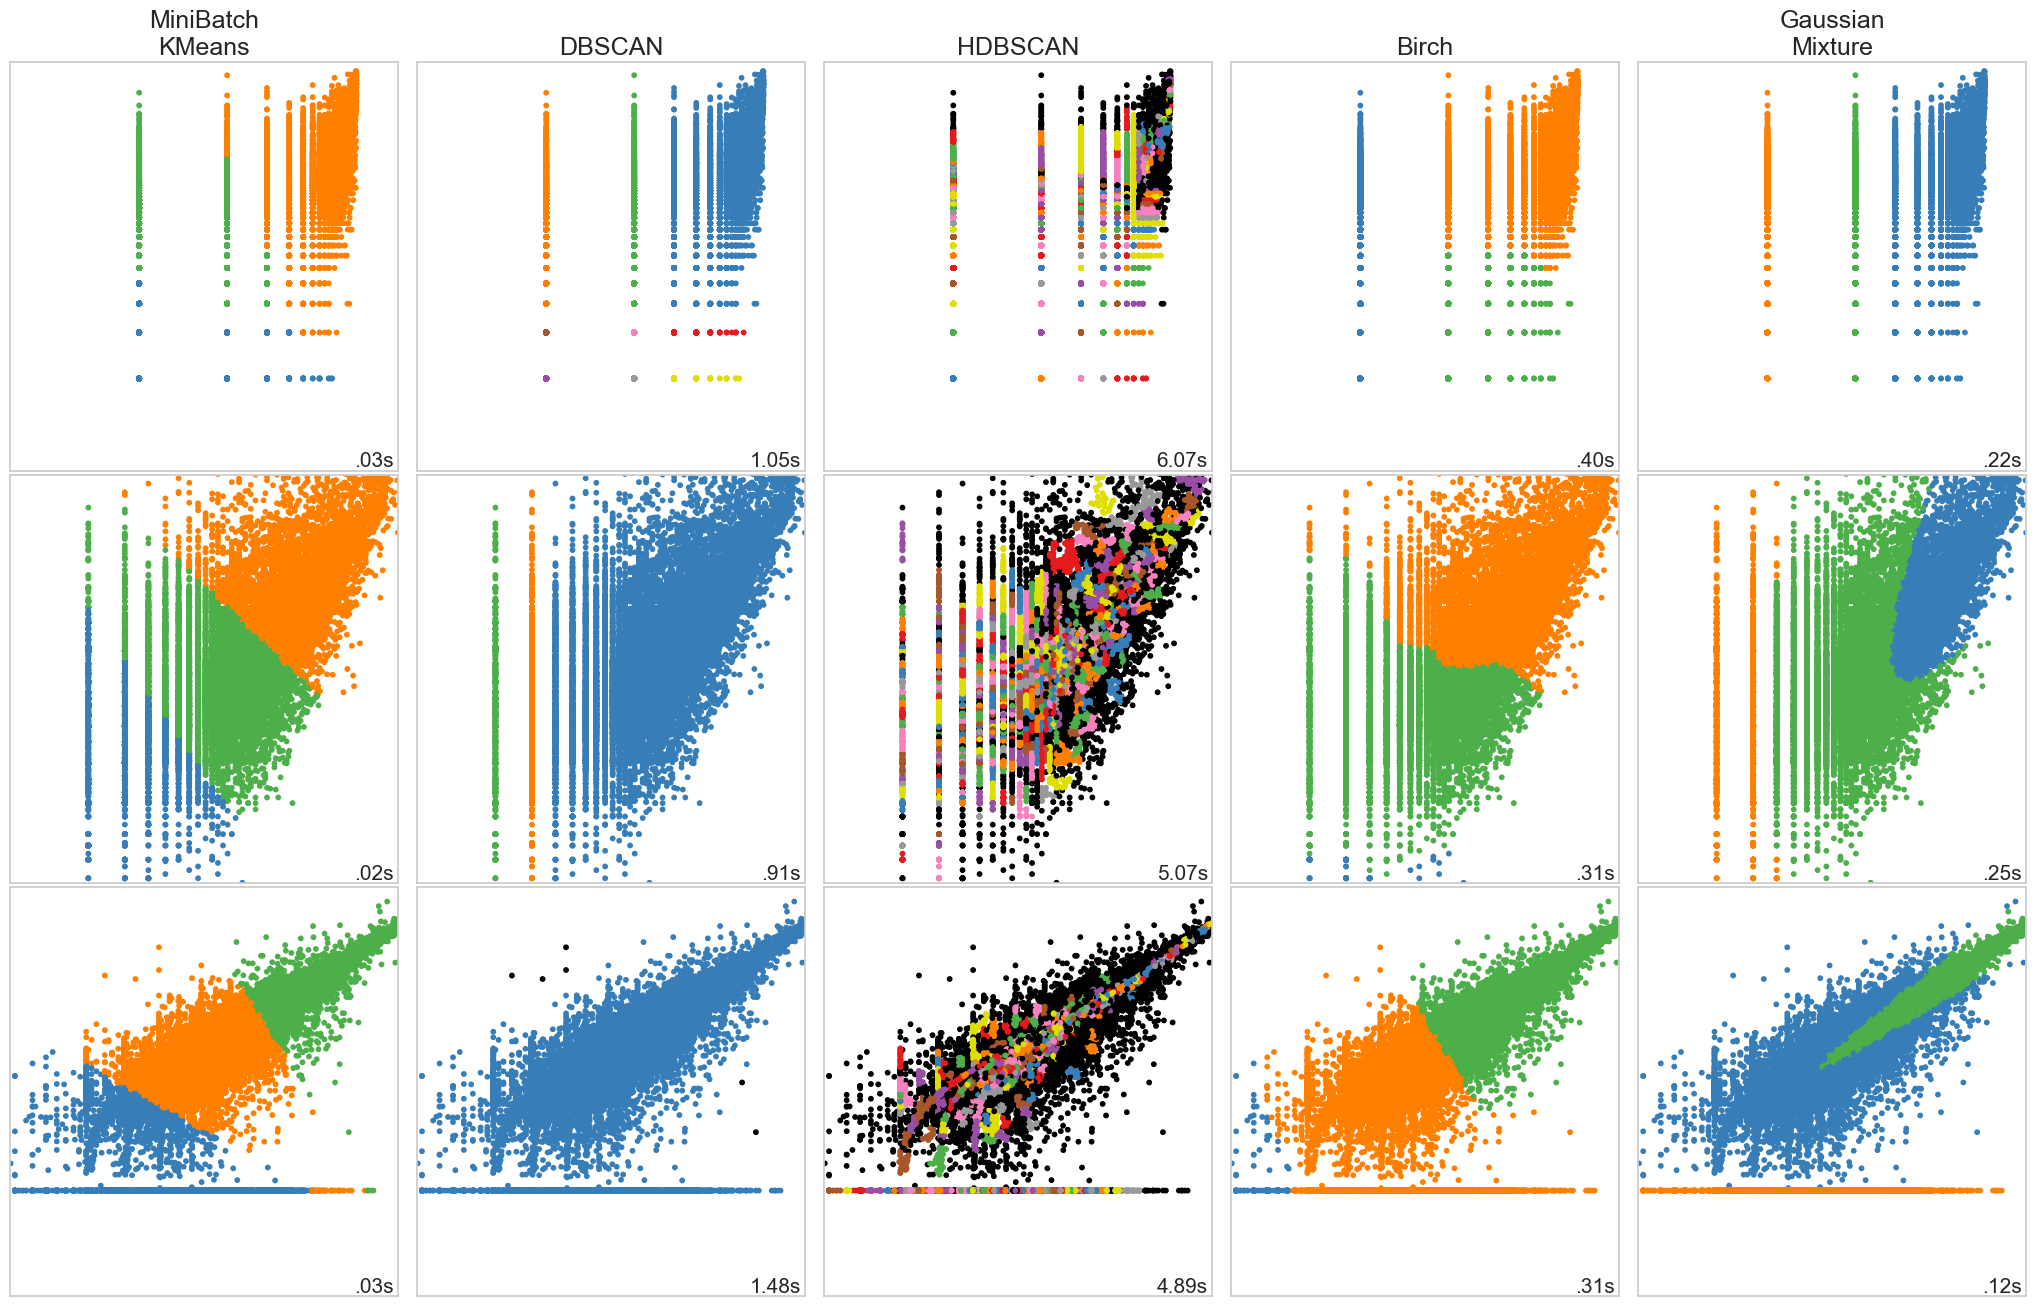

In [67]:
import time
import warnings
from itertools import cycle, islice
from sklearn import cluster, mixture
from sklearn.neighbors import kneighbors_graph


# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 13))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01
)

plot_num = 1

default_base = {
    "quantile": 0.3,
    "eps": 0.3,
    "damping": 0.9,
    "preference": -200,
    "n_neighbors": 3,
    "n_clusters": 3,
    "min_samples": 7,
    "xi": 0.05,
    "min_cluster_size": 0.1,
    "allow_single_cluster": True,
    "hdbscan_min_cluster_size": 15,
    "hdbscan_min_samples": 3,
    "random_state": 42,
}

datasets =  [
  ( df[['purchases_count', 'days_with_bets', 'churned']], {}),
  ( df[['total_bets', 'total_risk', 'churned']], {}),
  ( df[['total_risk', 'total_win', 'churned']], {}),
]

for i_dataset, (dataset, algo_params) in enumerate(datasets):

  params = default_base.copy()
  params.update(algo_params)
  # make dataset appropriate for clustering
  X = dataset.drop(columns=['churned'])
  y = dataset['churned']

  # normalize dataset for easier parameter selection
  X = PowerTransformer().fit_transform(X)
  bandwidth = cluster.estimate_bandwidth(X, quantile=params["quantile"])

  # connectivity matrix for structured Ward
  connectivity = kneighbors_graph(
      X, n_neighbors=params["n_neighbors"], include_self=False
  )
  # make connectivity symmetric
  connectivity = 0.5 * (connectivity + connectivity.T)

  # ============
  # Create cluster objects
  # ============
  ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
  two_means = cluster.MiniBatchKMeans(
    n_clusters=params["n_clusters"],
    random_state=params["random_state"],
  )

  dbscan = cluster.DBSCAN(eps=params["eps"])
  hdbscan = cluster.HDBSCAN(
    min_samples=params["hdbscan_min_samples"],
    min_cluster_size=params["hdbscan_min_cluster_size"],
    allow_single_cluster=params["allow_single_cluster"],
  )

  birch = cluster.Birch(n_clusters=params["n_clusters"])
  gmm = mixture.GaussianMixture(
      n_components=params["n_clusters"],
      covariance_type="full",
      random_state=params["random_state"],
  )

  clustering_algorithms = (
    ("MiniBatch\nKMeans", two_means),
    ("DBSCAN", dbscan),
    ("HDBSCAN", hdbscan),
    ("Birch", birch),
    ("Gaussian\nMixture", gmm),
  )

  for name, algorithm in clustering_algorithms:
    t0 = time.time()
    # catch warnings related to kneighbors_graph
    with warnings.catch_warnings():
      warnings.filterwarnings(
        "ignore",
        message="the number of connected components of the "
        + "connectivity matrix is [0-9]{1,2}"
        + " > 1. Completing it to avoid stopping the tree early.",
        category=UserWarning,
      )
      warnings.filterwarnings(
        "ignore",
        message="Graph is not fully connected, spectral embedding"
        + " may not work as expected.",
        category=UserWarning,
      )
      algorithm.fit(X)

    t1 = time.time()
    if hasattr(algorithm, "labels_"):
      y_pred = algorithm.labels_.astype(int)
    else:
      y_pred = algorithm.predict(X)

    plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
    if i_dataset == 0:
      plt.title(name, size=18)

    colors = np.array(
      list(
        islice(
          cycle(
            [
              "#377eb8",
              "#ff7f00",
              "#4daf4a",
              "#f781bf",
              "#a65628",
              "#984ea3",
              "#999999",
              "#e41a1c",
              "#dede00",
            ]
          ),
          int(max(y_pred) + 1),
        )
      )
    )

    # add black color for outliers (if any)
    colors = np.append(colors, ["#000000"])
    plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

    plt.xlim(-2.5, 2.5)
    plt.ylim(-2.5, 2.5)
    plt.xticks(())
    plt.yticks(())
    plt.text(
      0.99,
      0.01,
      ("%.2fs" % (t1 - t0)).lstrip("0"),
      transform=plt.gca().transAxes,
      size=15,
      horizontalalignment="right",
    )
    plot_num += 1

plt.show()

Se eligieron un subconjunto de datos con algunas de las columnas que presentan outliers y se aplicaaron varios algoritmos de clustering para identificar patrones o agrupaciones (clusters) en los datos con características similares.

La agrupación que mejor que aparentemente separa mejor los datos en los 3 conjuntos de datos son Kmeans, Birch y GaussianMixture.

Estos clusters podrían ser usados para identificar a los usuarios que tienen un comportamiento similar y poder aplicar diferentes modelos de predicción para cada grupo de usuarios.


### ¿Se deberían normalizar las imágenes para visualizarlas mejor?
No tenemos imágenes en el conjunto de datos.


### ¿Hay desequilibrio en las clases de la variable objetivo?

Si existe una gran diferencia entre las clases de la variable objetivo, lo cual puede afectar el desempeño del modelo de clasificación.

| Clase | Cantidad | Porcentaje |
| --- | ---  | --- |
| 1   | 21845 | 94.63 |
| 0   |  1238 | 05.36 |

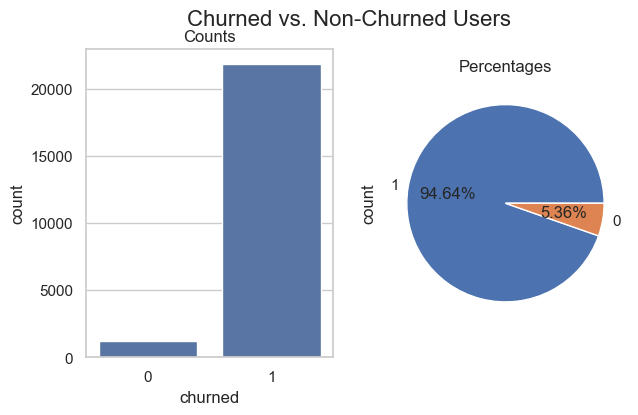

In [76]:
# plot side by side class imbalances and their percentages
fig, ax = plt.subplots(1, 2, figsize=(7, 4))

# set overall title
fig.suptitle('Churned vs. Non-Churned Users', fontsize=16)

sns.countplot(x='churned', data=df, ax=ax[0])
ax[0].set_title('Counts')

df['churned'].value_counts().plot.pie(autopct='%1.2f%%', ax=ax[1])
ax[1].set_title('Percentages')

plt.show()



## Informacion con datasets adicionales

In [84]:
def create_years_range(min: int, max: int) -> dict:
    diff = max - min + 1
    years_range = dict()
    minimum_date = '{}-12-31'
    maximum_date = '{}-01-01'
    for i in range(diff):
        years_range[i] = (minimum_date.format(min + i - 1), maximum_date.format(min + i + 1))
    return years_range

In [85]:
def extract_yearly(dataset: pd.DataFrame) -> dict:
    min_year = dataset.created.min().year
    max_year = dataset.created.max().year
    historical_years = dict()
    years_range = create_years_range(min_year, max_year)
    for keys in years_range:
        lower = years_range[keys][0]
        upper = years_range[keys][1]
        historical_years[keys] = dataset[(dataset.created > lower) & (dataset.created < upper)]
    return historical_years

In [79]:
df_users = pd.read_csv('./data/users.csv')
df_users.head()

id           last_login              created
0   1  2024-01-11 20:12:45  2015-05-26 18:51:23
1  10  2024-01-09 00:15:19  2015-06-08 12:47:23
2  11  2020-09-27 18:31:53  2015-06-08 12:51:36
3  12  2021-10-01 03:27:07  2015-06-08 13:02:16
4  13  2023-09-07 23:44:07  2015-06-08 13:03:17

In [81]:
df_cashouts = pd.read_csv('./data/user_cashouts.csv', parse_dates=[2])
df_cashouts.head()

user_id    amount             created
0    14239    100.00 2016-12-20 16:32:27
1       23   1000.00 2017-01-03 04:53:59
2     5659  11962.08 2017-01-04 16:25:09
3      286  30146.00 2017-01-04 17:23:43
4      260  37500.00 2017-01-06 15:24:24

In [83]:
df_bet = pd.read_csv('./data/betting_activity.csv', parse_dates=[4])
df_bet.head()

user_id  game   risk   win             created
0        1  pool  100.0   0.0 2016-11-16 20:22:39
1        1  pool   50.0   0.0 2016-11-16 20:25:45
2       13  pool   50.0   0.0 2016-11-16 21:13:30
3       11  pool   50.0   0.0 2016-11-16 21:49:33
4       11  pool   25.0  75.0 2016-11-16 21:49:57

## Análisis de cashouts

In [86]:
year_ranges = extract_yearly(df_cashouts)
year_ranges[0]

user_id  amount             created
0    14239   100.0 2016-12-20 16:32:27

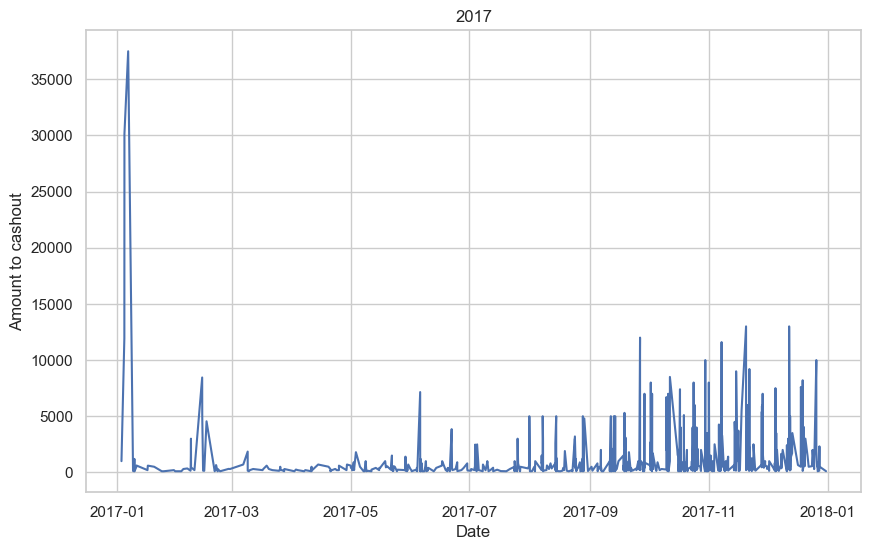

In [87]:
plt.figure(figsize=(10,6))
plt.xlabel('Date')
plt.ylabel('Amount to cashout')
plt.title('2017')

plt.plot(year_ranges[1]['created'], year_ranges[1]['amount'])

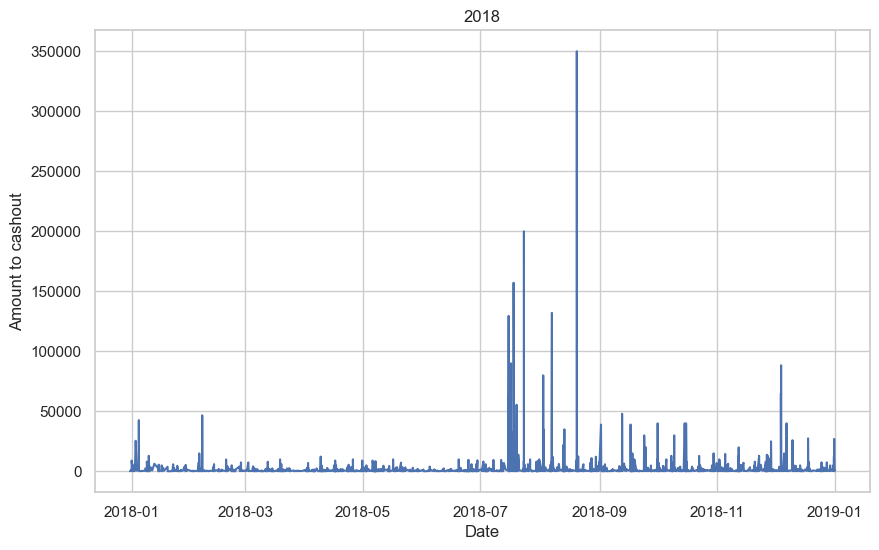

In [88]:
plt.figure(figsize=(10,6))
plt.xlabel('Date')
plt.ylabel('Amount to cashout')
plt.title('2018')

plt.plot(year_ranges[2]['created'], year_ranges[2]['amount'])

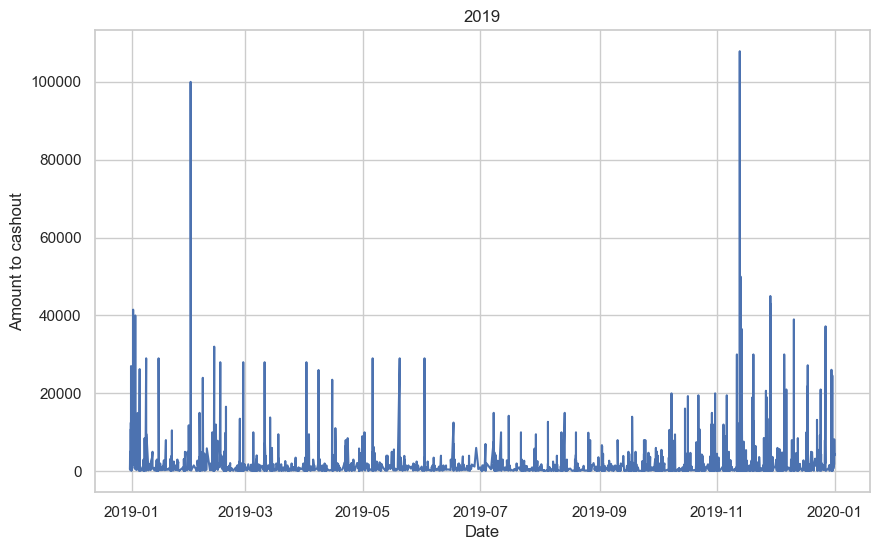

In [89]:
plt.figure(figsize=(10,6))
plt.xlabel('Date')
plt.ylabel('Amount to cashout')
plt.title('2019')

plt.plot(year_ranges[3]['created'], year_ranges[3]['amount'])

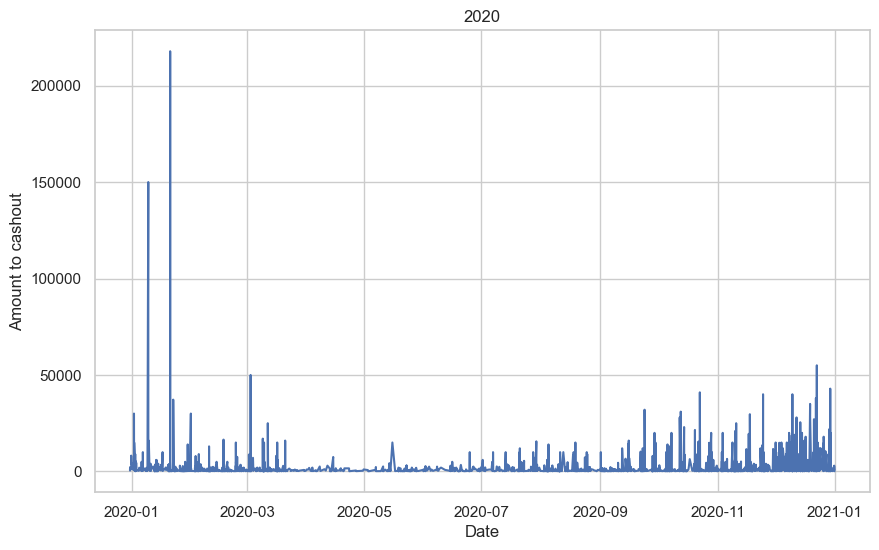

In [90]:
plt.figure(figsize=(10,6))
plt.xlabel('Date')
plt.ylabel('Amount to cashout')
plt.title('2020')

plt.plot(year_ranges[4]['created'], year_ranges[4]['amount'])

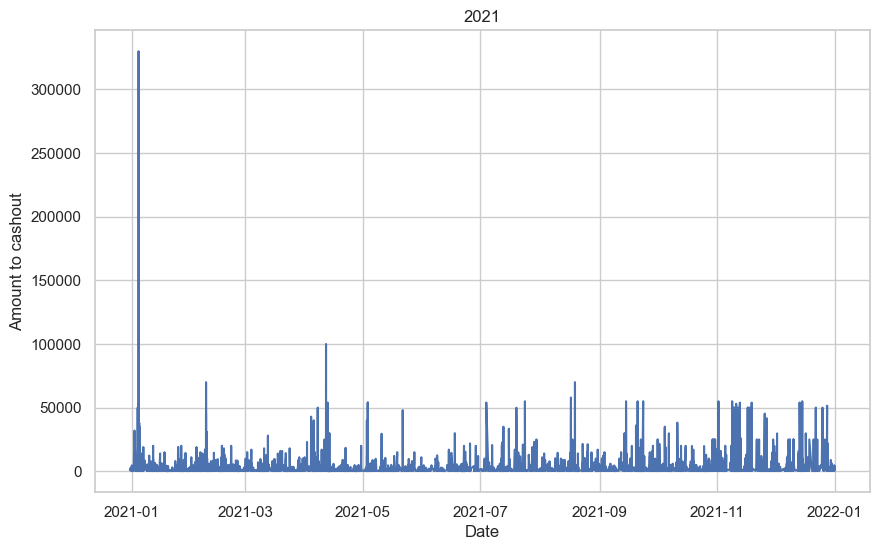

In [91]:
plt.figure(figsize=(10,6))
plt.xlabel('Date')
plt.ylabel('Amount to cashout')
plt.title('2021')

plt.plot(year_ranges[5]['created'], year_ranges[5]['amount'])

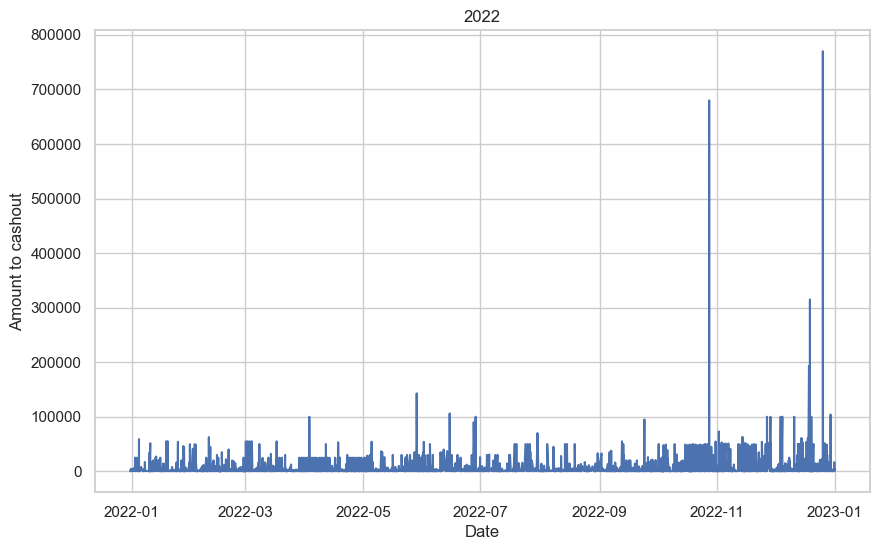

In [92]:
plt.figure(figsize=(10,6))
plt.xlabel('Date')
plt.ylabel('Amount to cashout')
plt.title('2022')

plt.plot(year_ranges[6]['created'], year_ranges[6]['amount'])

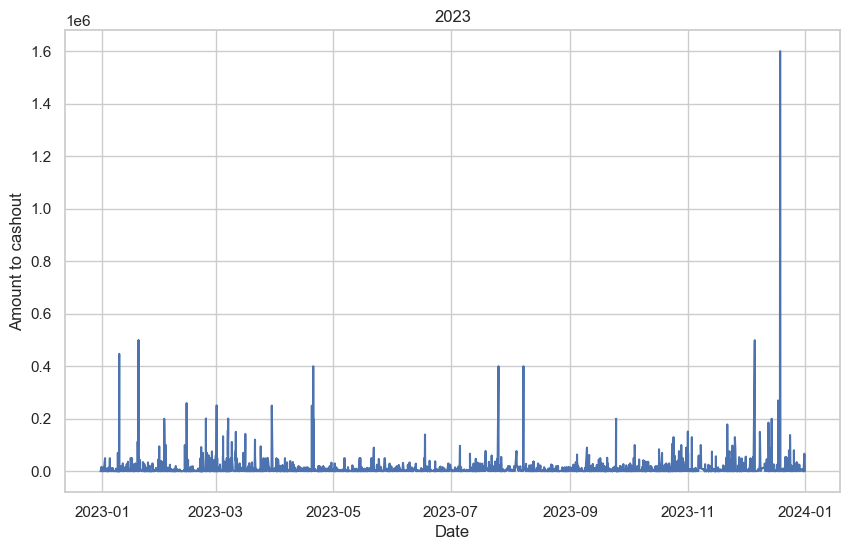

In [93]:
plt.figure(figsize=(10,6))
plt.xlabel('Date')
plt.ylabel('Amount to cashout')
plt.title('2023')

plt.plot(year_ranges[7]['created'], year_ranges[7]['amount'])

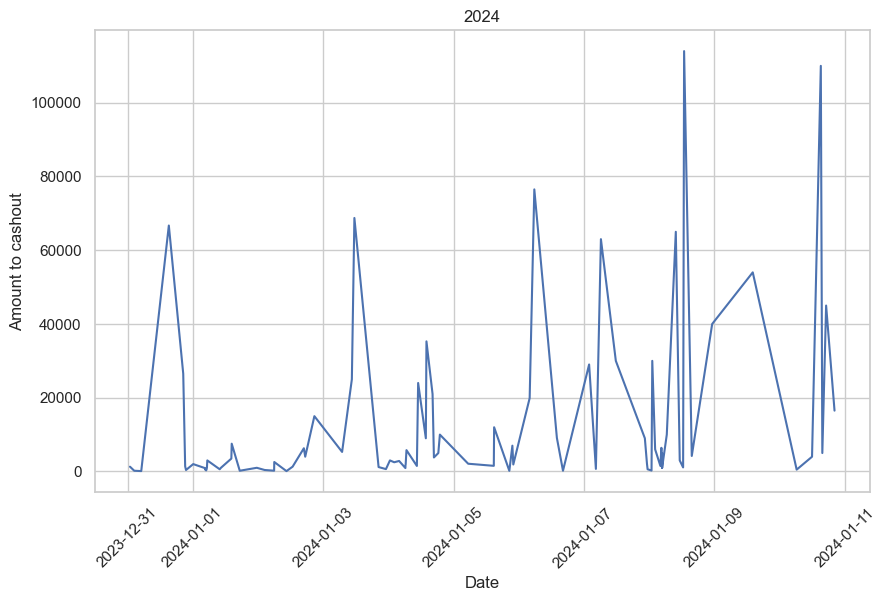

In [94]:
plt.figure(figsize=(10,6))
plt.xlabel('Date')
plt.ylabel('Amount to cashout')
plt.title('2024')
plt.xticks(rotation=45)

plt.plot(year_ranges[8]['created'], year_ranges[8]['amount'])

In [97]:
df_tmp = df_cashouts.copy()
df_tmp['month_year'] = df_tmp.created.dt.to_period('M')

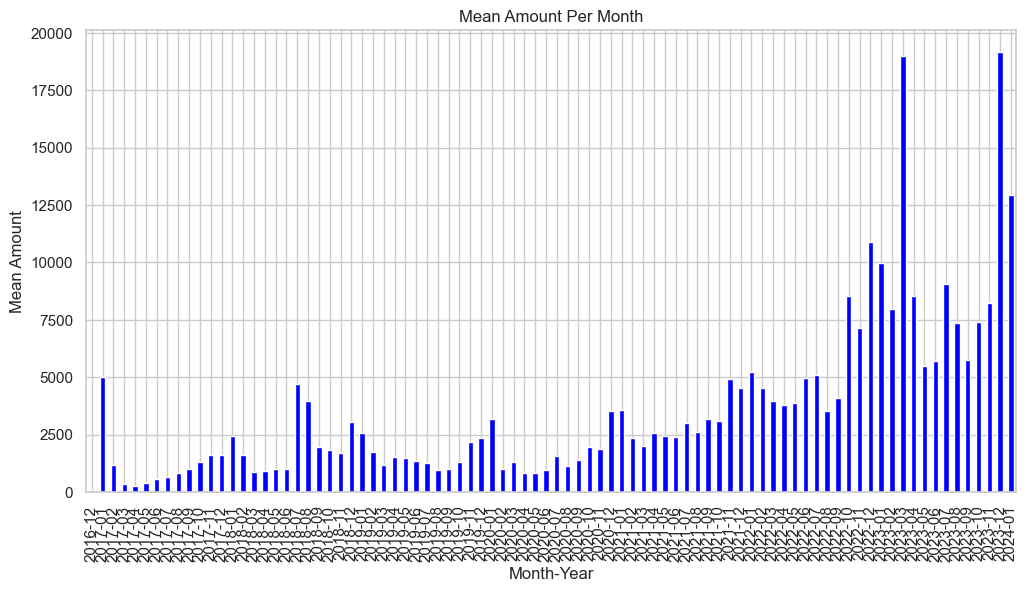

In [98]:
# df_tmp.head()
monthly_mean_cashouts = df_tmp.groupby('month_year')['amount'].mean()
# monthly_mean_cashouts.shape # 86

plt.figure(figsize=(12, 6))
monthly_mean_cashouts.plot(kind='bar', color='blue')
plt.title('Mean Amount Per Month')
plt.xlabel('Month-Year')
plt.ylabel('Mean Amount')
plt.show()

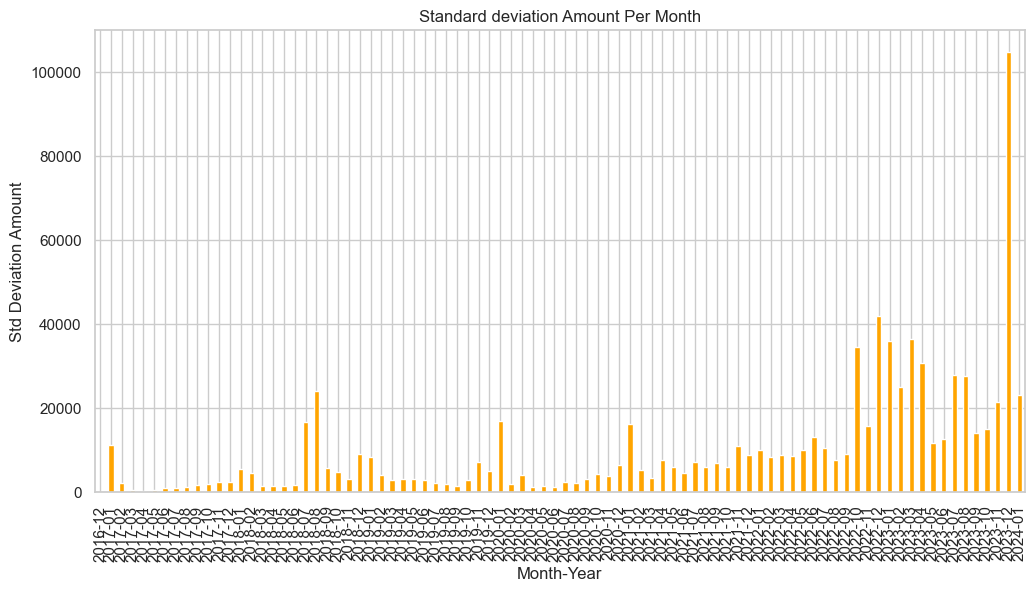

In [99]:
monthly_std = df_tmp.groupby('month_year')['amount'].std()

plt.figure(figsize=(12, 6))
monthly_std.plot(kind='bar', color='orange')
plt.title('Standard deviation Amount Per Month')
plt.xlabel('Month-Year')
plt.ylabel('Std Deviation Amount')
plt.show()

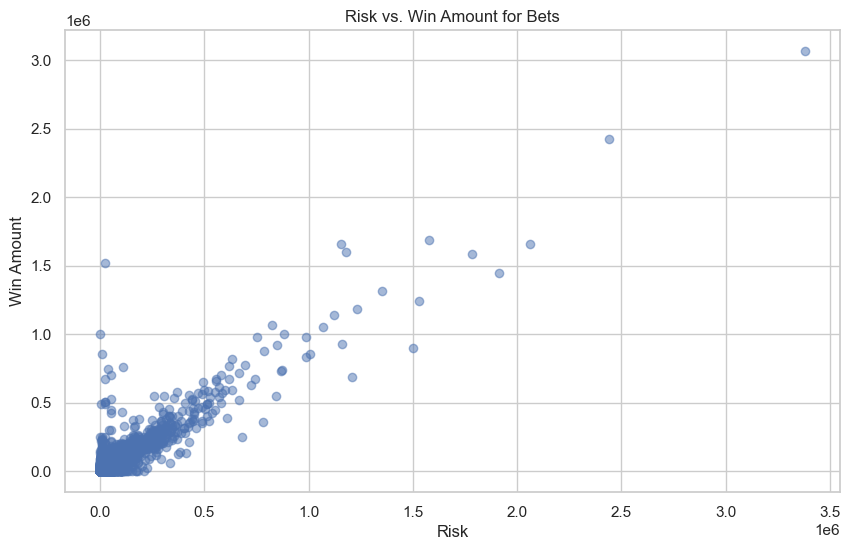

In [100]:
plt.figure(figsize=(10, 6))
plt.scatter(df_bet['risk'], df_bet['win'], alpha=0.5)
plt.title('Risk vs. Win Amount for Bets')
plt.xlabel('Risk')
plt.ylabel('Win Amount')
plt.show()

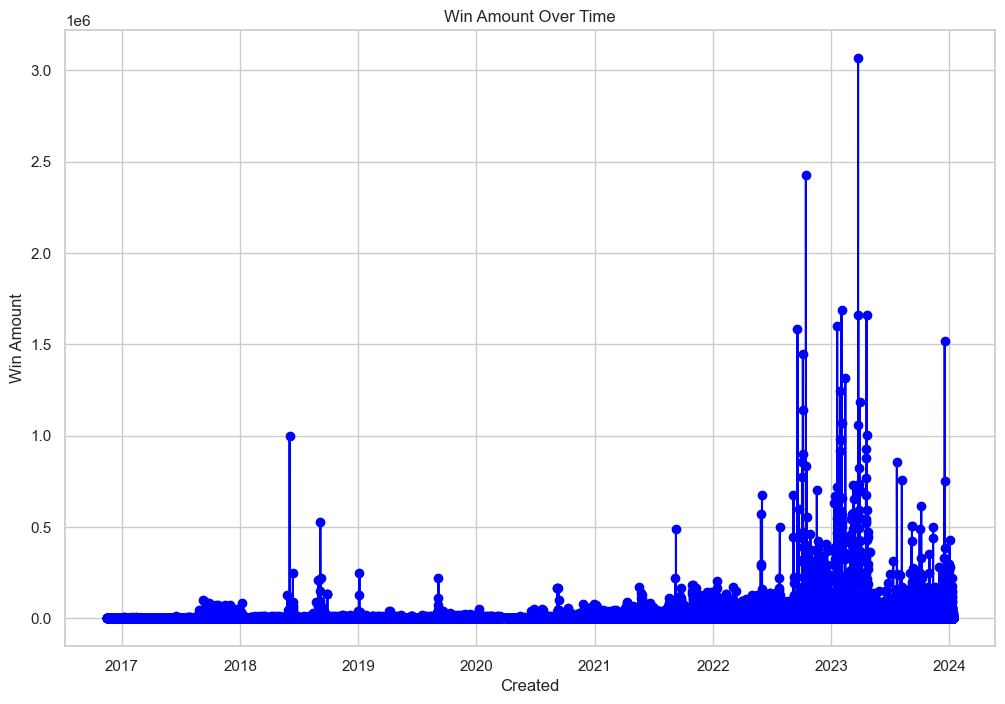

In [101]:
plt.figure(figsize=(12, 8))
plt.plot(df_bet['created'], df_bet['win'], marker='o', linestyle='-', color='blue')
plt.title('Win Amount Over Time')
plt.xlabel('Created')
plt.ylabel('Win Amount')
plt.show()

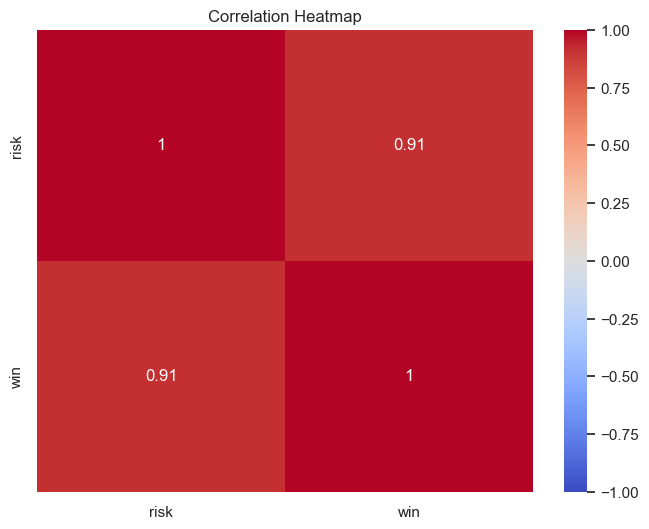

In [102]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_bet[['risk', 'win']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()